#Final Project - Disease Predictor
##Intro to Machine Learning
###Rhichard Koh

#Data Preprocessing

Importing the dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ROCCYK/DiseasePredictionUsingSymptoms/main/data/dataset.csv')

We can see that the more symptoms the disease has the less likely it is to be entered in

Text(0.5, 1.0, 'More Symptoms less entries')

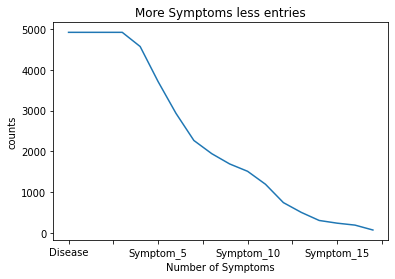

In [2]:
ax = df.count().plot()

ax.set_xlabel("Number of Symptoms")
ax.set_ylabel("counts")
ax.set_title('More Symptoms less entries')

Most Frequent Symptom 1 entries

Text(0.5, 1.0, 'Most Frequent Symptom 1 entries')

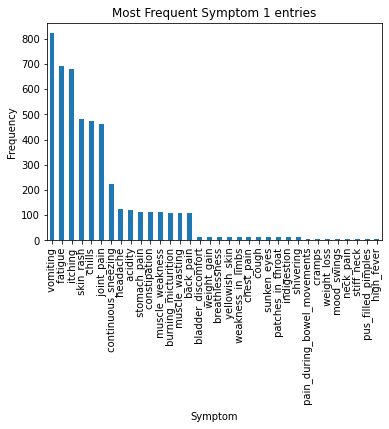

In [3]:
ax = df['Symptom_1'].value_counts().plot(kind = 'bar')

ax.set_xlabel("Symptom")
ax.set_ylabel("Frequency")
ax.set_title('Most Frequent Symptom 1 entries')

Text(0.5, 1.0, 'Most Frequent Symptom 1 entries')

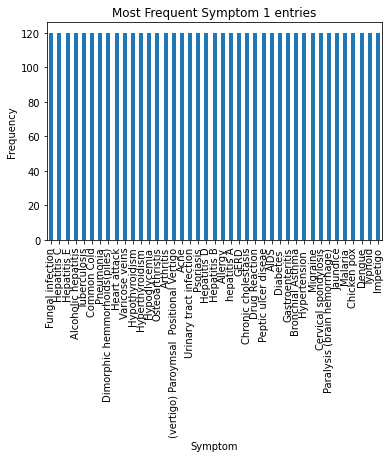

In [4]:
ax = df['Disease'].value_counts().plot(kind = 'bar')

ax.set_xlabel("Symptom")
ax.set_ylabel("Frequency")
ax.set_title('Most Frequent Symptom 1 entries')

Adding a symptom column and setting all the rows to 0

In [5]:
df['Symptoms'] = 0
df

Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   nodal_skin_eruptions        dischromic _patches   
1      nodal_skin_eruptions    dischromic _patches                        NaN   
2      nodal_skin_eruptions    dischromic _patches                        NaN   
3                 skin_rash    dischromic _patches                        NaN   
4                 skin_rash   nodal_skin_eruptions                        NaN   
...                     ...                    ...                        ...   
4915               headache                 nausea         spinning_movements   
4916     pus_filled_pimples             blackheads                   scurring   
4917     bladder_discomfort    foul_smell_of urine   continuous_feel_of_urine   
4918             joint_pain           skin_peeling        silver_like_dusting   
4919             high_fever                blister       red_sore_around_nose   

                  Symptom_5            Symptom_6 Symptom_7 Symptom_8  \
0                       NaN                  NaN       NaN       NaN   
1                       NaN                  NaN       NaN       NaN   
2                       NaN                  NaN       NaN       NaN   
3                       NaN                  NaN       NaN       NaN   
4                       NaN                  NaN       NaN       NaN   
...                     ...                  ...       ...       ...   
4915        loss_of_balance         unsteadiness       NaN       NaN   
4916                    NaN                  NaN       NaN       NaN   
4917                    NaN                  NaN       NaN       NaN   
4918   small_dents_in_nails   inflammatory_nails       NaN       NaN   
4919      yellow_crust_ooze                  NaN       NaN       NaN   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
...        ...        ...        ...        ...        ...        ...   
4915       NaN        NaN        NaN        NaN        NaN        NaN   
4916       NaN        NaN        NaN        NaN        NaN        NaN   
4917       NaN        NaN        NaN        NaN        NaN        NaN   
4918       NaN        NaN        NaN        NaN        NaN        NaN   
4919       NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_15 Symptom_16 Symptom_17  Symptoms  
0           NaN        NaN        NaN         0  
1           NaN        NaN        NaN         0  
2           NaN        NaN        NaN         0  
3           NaN        NaN        NaN         0  
4           NaN        NaN        NaN         0  
...         ...        ...        ...       ...  
4915        NaN        NaN        NaN         0  
4916        NaN        NaN        NaN         0  
4917        NaN     

Putting all the symptoms of each row in a list then replacing the 0s in the symptom column with the symptom list.

In [6]:
for i in range(len(df)):
  vals = df.iloc[i].values
  vals = vals.tolist()
  if 0 in vals:
    df['Symptoms'][i] = vals[1:vals.index(0)]
  else:
    df['Symptoms'][i] = vals[1:]
df

<ipython-input-6-5c460bfbdcc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Symptoms'][i] = vals[1:vals.index(0)]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   nodal_skin_eruptions        dischromic _patches   
1      nodal_skin_eruptions    dischromic _patches                        NaN   
2      nodal_skin_eruptions    dischromic _patches                        NaN   
3                 skin_rash    dischromic _patches                        NaN   
4                 skin_rash   nodal_skin_eruptions                        NaN   
...                     ...                    ...                        ...   
4915               headache                 nausea         spinning_movements   
4916     pus_filled_pimples             blackheads                   scurring   
4917     bladder_discomfort    foul_smell_of urine   continuous_feel_of_urine   
4918             joint_pain           skin_peeling        silver_like_dusting   
4919             high_fever                blister       red_sore_around_nose   

                  Symptom_5            Symptom_6 Symptom_7 Symptom_8  \
0                       NaN                  NaN       NaN       NaN   
1                       NaN                  NaN       NaN       NaN   
2                       NaN                  NaN       NaN       NaN   
3                       NaN                  NaN       NaN       NaN   
4                       NaN                  NaN       NaN       NaN   
...                     ...                  ...       ...       ...   
4915        loss_of_balance         unsteadiness       NaN       NaN   
4916                    NaN                  NaN       NaN       NaN   
4917                    NaN                  NaN       NaN       NaN   
4918   small_dents_in_nails   inflammatory_nails       NaN       NaN   
4919      yellow_crust_ooze                  NaN       NaN       NaN   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
...        ...        ...        ...        ...        ...        ...   
4915       NaN        NaN        NaN        NaN        NaN        NaN   
4916       NaN        NaN        NaN        NaN        NaN        NaN   
4917       NaN        NaN        NaN        NaN        NaN        NaN   
4918       NaN        NaN        NaN        NaN        NaN        NaN   
4919       NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_15 Symptom_16 Symptom_17  \
0           NaN        NaN        NaN   
1           NaN        NaN        NaN   
2           NaN        NaN        NaN   
3           NaN        NaN        NaN   
4           NaN        NaN        NaN   
...         ...        ...        ...   
4915        NaN        NaN        NaN   
4916        NaN        NaN        NaN   
4917        NaN        NaN        NaN   
4918        NaN        NaN        NaN   
4919        NaN    

Unraveling the symptom column symptom lists.

In [7]:
col_vals = df.iloc[:,1:-1].values.ravel()
col_vals

array(['itching', ' skin_rash', ' nodal_skin_eruptions', ..., nan, nan,
       nan], dtype=object)

Getting all of the unique values of the symptom list, ignores if its nan.

In [8]:
symptoms = pd.unique(col_vals)
symptoms.tolist()
symptoms = [i for i in symptoms if str(i) != 'nan']
symptoms

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' stomach_pain',
 ' acidity',
 ' ulcers_on_tongue',
 ' vomiting',
 ' cough',
 ' chest_pain',
 ' yellowish_skin',
 ' nausea',
 ' loss_of_appetite',
 ' abdominal_pain',
 ' yellowing_of_eyes',
 ' burning_micturition',
 ' spotting_ urination',
 ' passage_of_gases',
 ' internal_itching',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' high_fever',
 ' extra_marital_contacts',
 ' fatigue',
 ' weight_loss',
 ' restlessness',
 ' lethargy',
 ' irregular_sugar_level',
 ' blurred_and_distorted_vision',
 ' obesity',
 ' excessive_hunger',
 ' increased_appetite',
 ' polyuria',
 ' sunken_eyes',
 ' dehydration',
 ' diarrhoea',
 ' breathlessness',
 ' family_history',
 ' mucoid_sputum',
 ' headache',
 ' dizziness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' stiff_neck',
 ' depression',
 ' irritability',
 ' visual_disturbances',
 

Made a new dataframe with the symptom names as the column and same index as the previous dataframe.

In [9]:
symptoms_df = pd.DataFrame(columns=symptoms, index=df.index)
symptoms_df

itching  skin_rash  nodal_skin_eruptions  dischromic _patches  \
0        NaN        NaN                   NaN                  NaN   
1        NaN        NaN                   NaN                  NaN   
2        NaN        NaN                   NaN                  NaN   
3        NaN        NaN                   NaN                  NaN   
4        NaN        NaN                   NaN                  NaN   
...      ...        ...                   ...                  ...   
4915     NaN        NaN                   NaN                  NaN   
4916     NaN        NaN                   NaN                  NaN   
4917     NaN        NaN                   NaN                  NaN   
4918     NaN        NaN                   NaN                  NaN   
4919     NaN        NaN                   NaN                  NaN   

      continuous_sneezing  shivering  chills  watering_from_eyes  \
0                     NaN        NaN     NaN                 NaN   
1                     NaN        NaN     NaN                 NaN   
2                     NaN        NaN     NaN                 NaN   
3                     NaN        NaN     NaN                 NaN   
4                     NaN        NaN     NaN                 NaN   
...                   ...        ...     ...                 ...   
4915                  NaN        NaN     NaN                 NaN   
4916                  NaN        NaN     NaN                 NaN   
4917                  NaN        NaN     NaN                 NaN   
4918                  NaN        NaN     NaN                 NaN   
4919                  NaN        NaN     NaN                 NaN   

      stomach_pain  acidity  ...  bladder_discomfort  foul_smell_of urine  \
0              NaN      NaN  ...                 NaN                  NaN   
1              NaN      NaN  ...                 NaN                  NaN   
2              NaN      NaN  ...                 NaN                  NaN   
3              NaN      NaN  ...                 NaN                  NaN   
4              NaN      NaN  ...                 NaN                  NaN   
...            ...      ...  ...                 ...                  ...   
4915           NaN      NaN  ...                 NaN                  NaN   
4916           NaN      NaN  ...                 NaN                  NaN   
4917           NaN      NaN  ...                 NaN                  NaN   
4918           NaN      NaN  ...                 NaN                  NaN   
4919           NaN      NaN  ...                 NaN                  NaN   

      continuous_feel_of_urine  skin_peeling  silver_like_dusting  \
0                          NaN           NaN                  NaN   
1                          NaN           NaN                  NaN   
2                          NaN           NaN                  NaN   
3                          NaN           NaN                  NaN   
4                          NaN           NaN                  NaN   
...                        ...           ...                  ...   
4915                       NaN           NaN                  NaN   
4916                       NaN           NaN                  NaN   
4917                       NaN           NaN                  NaN   
4918                       NaN           NaN                  NaN   
4919                       NaN           NaN                  NaN   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                      NaN                 NaN      NaN                   NaN   
1                      NaN                 NaN      NaN                   NaN   
2                      NaN                 NaN      NaN                   NaN   
3                      NaN                 NaN      NaN                   NaN   
4                      NaN                 NaN      NaN                   NaN   
...                    ...                 ...      ...                   ...   
4915                   NaN

Copied the symptom column and the symptom lists for each row from the previous dataframe.

In [10]:
symptoms_df['Symptoms'] = df['Symptoms']
symptoms_df

itching  skin_rash  nodal_skin_eruptions  dischromic _patches  \
0        NaN        NaN                   NaN                  NaN   
1        NaN        NaN                   NaN                  NaN   
2        NaN        NaN                   NaN                  NaN   
3        NaN        NaN                   NaN                  NaN   
4        NaN        NaN                   NaN                  NaN   
...      ...        ...                   ...                  ...   
4915     NaN        NaN                   NaN                  NaN   
4916     NaN        NaN                   NaN                  NaN   
4917     NaN        NaN                   NaN                  NaN   
4918     NaN        NaN                   NaN                  NaN   
4919     NaN        NaN                   NaN                  NaN   

      continuous_sneezing  shivering  chills  watering_from_eyes  \
0                     NaN        NaN     NaN                 NaN   
1                     NaN        NaN     NaN                 NaN   
2                     NaN        NaN     NaN                 NaN   
3                     NaN        NaN     NaN                 NaN   
4                     NaN        NaN     NaN                 NaN   
...                   ...        ...     ...                 ...   
4915                  NaN        NaN     NaN                 NaN   
4916                  NaN        NaN     NaN                 NaN   
4917                  NaN        NaN     NaN                 NaN   
4918                  NaN        NaN     NaN                 NaN   
4919                  NaN        NaN     NaN                 NaN   

      stomach_pain  acidity  ...  foul_smell_of urine  \
0              NaN      NaN  ...                  NaN   
1              NaN      NaN  ...                  NaN   
2              NaN      NaN  ...                  NaN   
3              NaN      NaN  ...                  NaN   
4              NaN      NaN  ...                  NaN   
...            ...      ...  ...                  ...   
4915           NaN      NaN  ...                  NaN   
4916           NaN      NaN  ...                  NaN   
4917           NaN      NaN  ...                  NaN   
4918           NaN      NaN  ...                  NaN   
4919           NaN      NaN  ...                  NaN   

      continuous_feel_of_urine  skin_peeling  silver_like_dusting  \
0                          NaN           NaN                  NaN   
1                          NaN           NaN                  NaN   
2                          NaN           NaN                  NaN   
3                          NaN           NaN                  NaN   
4                          NaN           NaN                  NaN   
...                        ...           ...                  ...   
4915                       NaN           NaN                  NaN   
4916                       NaN           NaN                  NaN   
4917                       NaN           NaN                  NaN   
4918                       NaN           NaN                  NaN   
4919                       NaN           NaN                  NaN   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                      NaN                 NaN      NaN                   NaN   
1                      NaN                 NaN      NaN                   NaN   
2                      NaN                 NaN      NaN                   NaN   
3                      NaN                 NaN      NaN                   NaN   
4                      NaN                 NaN      NaN                   NaN   
...                    ...                 ...      ...                   ...   
4915                   NaN                 NaN      NaN                   NaN   
4916                   NaN                 NaN      NaN                   NaN   
4917                   NaN                 NaN      NaN                   NaN   
4918                   

Populated the new dataframe with 1 if that symptom appears in the symptom column's symptom list or 0 if the symptom wasnt in the list for each row.

In [11]:
for i in symptoms:
  symptoms_df[i] = symptoms_df.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)
symptoms_df

itching   skin_rash   nodal_skin_eruptions   dischromic _patches  \
0           1           1                      1                     1   
1           0           1                      1                     1   
2           1           0                      1                     1   
3           1           1                      0                     1   
4           1           1                      1                     0   
...       ...         ...                    ...                   ...   
4915        0           0                      0                     0   
4916        0           1                      0                     0   
4917        0           0                      0                     0   
4918        0           1                      0                     0   
4919        0           1                      0                     0   

       continuous_sneezing   shivering   chills   watering_from_eyes  \
0                        0           0        0                    0   
1                        0           0        0                    0   
2                        0           0        0                    0   
3                        0           0        0                    0   
4                        0           0        0                    0   
...                    ...         ...      ...                  ...   
4915                     0           0        0                    0   
4916                     0           0        0                    0   
4917                     0           0        0                    0   
4918                     0           0        0                    0   
4919                     0           0        0                    0   

       stomach_pain   acidity  ...   foul_smell_of urine  \
0                 0         0  ...                     0   
1                 0         0  ...                     0   
2                 0         0  ...                     0   
3                 0         0  ...                     0   
4                 0         0  ...                     0   
...             ...       ...  ...                   ...   
4915              0         0  ...                     0   
4916              0         0  ...                     0   
4917              0         0  ...                     1   
4918              0         0  ...                     0   
4919              0         0  ...                     0   

       continuous_feel_of_urine   skin_peeling   silver_like_dusting  \
0                             0              0                     0   
1                             0              0                     0   
2                             0              0                     0   
3                             0              0                     0   
4                             0              0                     0   
...                         ...            ...                   ...   
4915                          0              0                     0   
4916                          0              0                     0   
4917                          1              0                     0   
4918                          0              1                     1   
4919                          0              0                     0   

       small_dents_in_nails   inflammatory_nails   blister  \
0                         0                    0         0   
1                         0                    0         0   
2                         0                    0         0   
3                         0                    0         0   
4                         0                    0         0   
...                     ...                  ...       ...   
4915                      0                    0         0   
4916                      0                    0         0   
4917                      0                    0         0   
4918                      1                   

Copied the target column which is the name of the disease from the previous dataframe and dropped the symptom column because we no longer need the list after populating the new dataframe.

In [12]:
symptoms_df['Disease'] = df["Disease"]
symptoms_df = symptoms_df.drop("Symptoms",axis=1)
symptoms_df

itching   skin_rash   nodal_skin_eruptions   dischromic _patches  \
0           1           1                      1                     1   
1           0           1                      1                     1   
2           1           0                      1                     1   
3           1           1                      0                     1   
4           1           1                      1                     0   
...       ...         ...                    ...                   ...   
4915        0           0                      0                     0   
4916        0           1                      0                     0   
4917        0           0                      0                     0   
4918        0           1                      0                     0   
4919        0           1                      0                     0   

       continuous_sneezing   shivering   chills   watering_from_eyes  \
0                        0           0        0                    0   
1                        0           0        0                    0   
2                        0           0        0                    0   
3                        0           0        0                    0   
4                        0           0        0                    0   
...                    ...         ...      ...                  ...   
4915                     0           0        0                    0   
4916                     0           0        0                    0   
4917                     0           0        0                    0   
4918                     0           0        0                    0   
4919                     0           0        0                    0   

       stomach_pain   acidity  ...   foul_smell_of urine  \
0                 0         0  ...                     0   
1                 0         0  ...                     0   
2                 0         0  ...                     0   
3                 0         0  ...                     0   
4                 0         0  ...                     0   
...             ...       ...  ...                   ...   
4915              0         0  ...                     0   
4916              0         0  ...                     0   
4917              0         0  ...                     1   
4918              0         0  ...                     0   
4919              0         0  ...                     0   

       continuous_feel_of_urine   skin_peeling   silver_like_dusting  \
0                             0              0                     0   
1                             0              0                     0   
2                             0              0                     0   
3                             0              0                     0   
4                             0              0                     0   
...                         ...            ...                   ...   
4915                          0              0                     0   
4916                          0              0                     0   
4917                          1              0                     0   
4918                          0              1                     1   
4919                          0              0                     0   

       small_dents_in_nails   inflammatory_nails   blister  \
0                         0                    0         0   
1                         0                    0         0   
2                         0                    0         0   
3                         0                    0         0   
4                         0                    0         0   
...                     ...                  ...       ...   
4915                      0                    0         0   
4916                      0                    0         0   
4917                      0                    0         0   
4918                      1                   

dropping the duplicates

In [13]:
print(symptoms_df.duplicated().sum())
symptoms_df = symptoms_df.drop_duplicates()
symptoms_df

4616


itching   skin_rash   nodal_skin_eruptions   dischromic _patches  \
0          1           1                      1                     1   
1          0           1                      1                     1   
2          1           0                      1                     1   
3          1           1                      0                     1   
4          1           1                      1                     0   
..       ...         ...                    ...                   ...   
402        0           0                      0                     0   
403        0           1                      0                     0   
405        0           1                      0                     0   
406        0           1                      0                     0   
407        0           1                      0                     0   

      continuous_sneezing   shivering   chills   watering_from_eyes  \
0                       0           0        0                    0   
1                       0           0        0                    0   
2                       0           0        0                    0   
3                       0           0        0                    0   
4                       0           0        0                    0   
..                    ...         ...      ...                  ...   
402                     0           0        0                    0   
403                     0           0        0                    0   
405                     0           0        0                    0   
406                     0           0        0                    0   
407                     0           0        0                    0   

      stomach_pain   acidity  ...   foul_smell_of urine  \
0                0         0  ...                     0   
1                0         0  ...                     0   
2                0         0  ...                     0   
3                0         0  ...                     0   
4                0         0  ...                     0   
..             ...       ...  ...                   ...   
402              0         0  ...                     0   
403              0         0  ...                     0   
405              0         0  ...                     0   
406              0         0  ...                     0   
407              0         0  ...                     0   

      continuous_feel_of_urine   skin_peeling   silver_like_dusting  \
0                            0              0                     0   
1                            0              0                     0   
2                            0              0                     0   
3                            0              0                     0   
4                            0              0                     0   
..                         ...            ...                   ...   
402                          0              0                     0   
403                          0              0                     0   
405                          0              0                     0   
406                          0              0                     0   
407                          0              0                     0   

      small_dents_in_nails   inflammatory_nails   blister  \
0                        0                    0         0   
1                        0                    0         0   
2                        0                    0         0   
3                        0                    0         0   
4                        0                    0         0   
..                     ...                  ...       ...   
402                      0                    0         1   
403                      0                    0         1   
405                      0                    0         0   
406                      0                    0         1   
407                      0                

Most frequent diseases

Text(0.5, 1.0, 'Most Frequent Diseases')

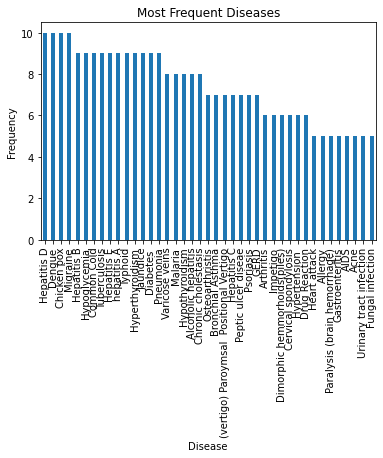

In [14]:
ax = symptoms_df['Disease'].value_counts().plot(kind = 'bar')
ax.set_xlabel("Disease")
ax.set_ylabel("Frequency")
ax.set_title('Most Frequent Diseases')

Correlation of each features

In [15]:
symptoms_df.corr()

itching   skin_rash   nodal_skin_eruptions  \
itching                1.000000    0.260536               0.207941   
 skin_rash             0.260536    1.000000               0.204742   
 nodal_skin_eruptions  0.207941    0.204742               1.000000   
 dischromic _patches   0.207941    0.204742               0.746667   
 continuous_sneezing  -0.080041   -0.081166              -0.023408   
...                         ...         ...                    ...   
 small_dents_in_nails -0.056025    0.285864              -0.016385   
 inflammatory_nails   -0.056025    0.285864              -0.016385   
 blister              -0.051058    0.248029              -0.014932   
 red_sore_around_nose -0.051058    0.248029              -0.014932   
 yellow_crust_ooze    -0.051058    0.248029              -0.014932   

                        dischromic _patches   continuous_sneezing   shivering  \
itching                            0.207941             -0.080041   -0.045591   
 skin_rash                         0.204742             -0.081166   -0.046232   
 nodal_skin_eruptions              0.746667             -0.023408   -0.013333   
 dischromic _patches               1.000000             -0.023408   -0.013333   
 continuous_sneezing              -0.023408              1.000000    0.421348   
...                                     ...                   ...         ...   
 small_dents_in_nails             -0.016385             -0.028765   -0.016385   
 inflammatory_nails               -0.016385             -0.028765   -0.016385   
 blister                          -0.014932             -0.026215   -0.014932   
 red_sore_around_nose             -0.014932             -0.026215   -0.014932   
 yellow_crust_ooze                -0.014932             -0.026215   -0.014932   

                         chills   watering_from_eyes   stomach_pain   acidity  \
itching               -0.181433            -0.045591       0.129766 -0.089952   
 skin_rash             0.017026            -0.046232       0.126609 -0.091216   
 nodal_skin_eruptions -0.053060            -0.013333      -0.022373 -0.026307   
 dischromic _patches  -0.053060            -0.013333      -0.022373 -0.026307   
 continuous_sneezing   0.352109             0.421348      -0.039279 -0.046184   
...                         ...                  ...            ...       ...   
 small_dents_in_nails -0.065203            -0.016385      -0.027493 -0.032327   
 inflammatory_nails   -0.065203            -0.016385      -0.027493 -0.032327   
 blister              -0.059422            -0.014932      -0.025056 -0.029461   
 red_sore_around_nose -0.059422            -0.014932      -0.025056 -0.029461   
 yellow_crust_ooze    -0.059422            -0.014932      -0.025056 -0.029461   

                       ...   bladder_discomfort   foul_smell_of urine  \
itching                ...            -0.045591             -0.045591   
 skin_rash             ...            -0.046232             -0.046232   
 nodal_skin_eruptions  ...            -0.013333             -0.013333   
 dischromic _patches   ...            -0.013333             -0.013333   
 continuous_sneezing   ...            -0.023408             -0.023408   
...                    ...                  ...                   ...   
 small_dents_in_nails  ...            -0.016385             -0.016385   
 inflammatory_nails    ...            -0.016385             -0.016385   
 blister               ...            -0.014932             -0.014932   
 red_sore_around_nose  ...            -0.014932             -0.014932   
 yellow_crust_ooze     ...            -0.014932             -0.014932   

                        continuous_feel_of_urine   skin_peeling  \
itching                                -0.045591      -0.056025   
 skin_rash                             -0.046232       0.285864   
 nodal_skin_eruptions                  -0.013333      -0.016385   
 dischromic _patches                   -0.013333      -0.016385   
 continuous_sneezing     

plotting the correlations

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(200, 120))

heatmap = sns.heatmap(round(symptoms_df.corr(),2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)


In [17]:
symptoms_df.hist(figsize=(200, 120))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fb334fbb0>,
      dtype=object)

Creating keymap to encode target column

In [18]:
keymap = {}
for i, disease in enumerate(symptoms_df['Disease'].unique(), 1):
  keymap[disease] = i
keymap

{'Fungal infection': 1,
 'Allergy': 2,
 'GERD': 3,
 'Chronic cholestasis': 4,
 'Drug Reaction': 5,
 'Peptic ulcer diseae': 6,
 'AIDS': 7,
 'Diabetes ': 8,
 'Gastroenteritis': 9,
 'Bronchial Asthma': 10,
 'Hypertension ': 11,
 'Migraine': 12,
 'Cervical spondylosis': 13,
 'Paralysis (brain hemorrhage)': 14,
 'Jaundice': 15,
 'Malaria': 16,
 'Chicken pox': 17,
 'Dengue': 18,
 'Typhoid': 19,
 'hepatitis A': 20,
 'Hepatitis B': 21,
 'Hepatitis C': 22,
 'Hepatitis D': 23,
 'Hepatitis E': 24,
 'Alcoholic hepatitis': 25,
 'Tuberculosis': 26,
 'Common Cold': 27,
 'Pneumonia': 28,
 'Dimorphic hemmorhoids(piles)': 29,
 'Heart attack': 30,
 'Varicose veins': 31,
 'Hypothyroidism': 32,
 'Hyperthyroidism': 33,
 'Hypoglycemia': 34,
 'Osteoarthristis': 35,
 'Arthritis': 36,
 '(vertigo) Paroymsal  Positional Vertigo': 37,
 'Acne': 38,
 'Urinary tract infection': 39,
 'Psoriasis': 40,
 'Impetigo': 41}

Split the train and test data, the target is the 'Disease' column and the features are everything else other than the 'Disease' column.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X = symptoms_df.iloc[:,symptoms_df.columns != 'Disease']
y = symptoms_df['Disease'].map(keymap)
SEED = 4
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=SEED)

#Random Forest Classifier

Training a Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

rfc = RandomForestClassifier(criterion='entropy',n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=16, n_estimators=500,
                       n_jobs=-1, random_state=42)

Cross Validiation Score

In [21]:
cross_val_score(rfc,X_train,y_train,cv=3).mean()

0.9629629629629629

Accuracy Score

In [22]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9508196721311475

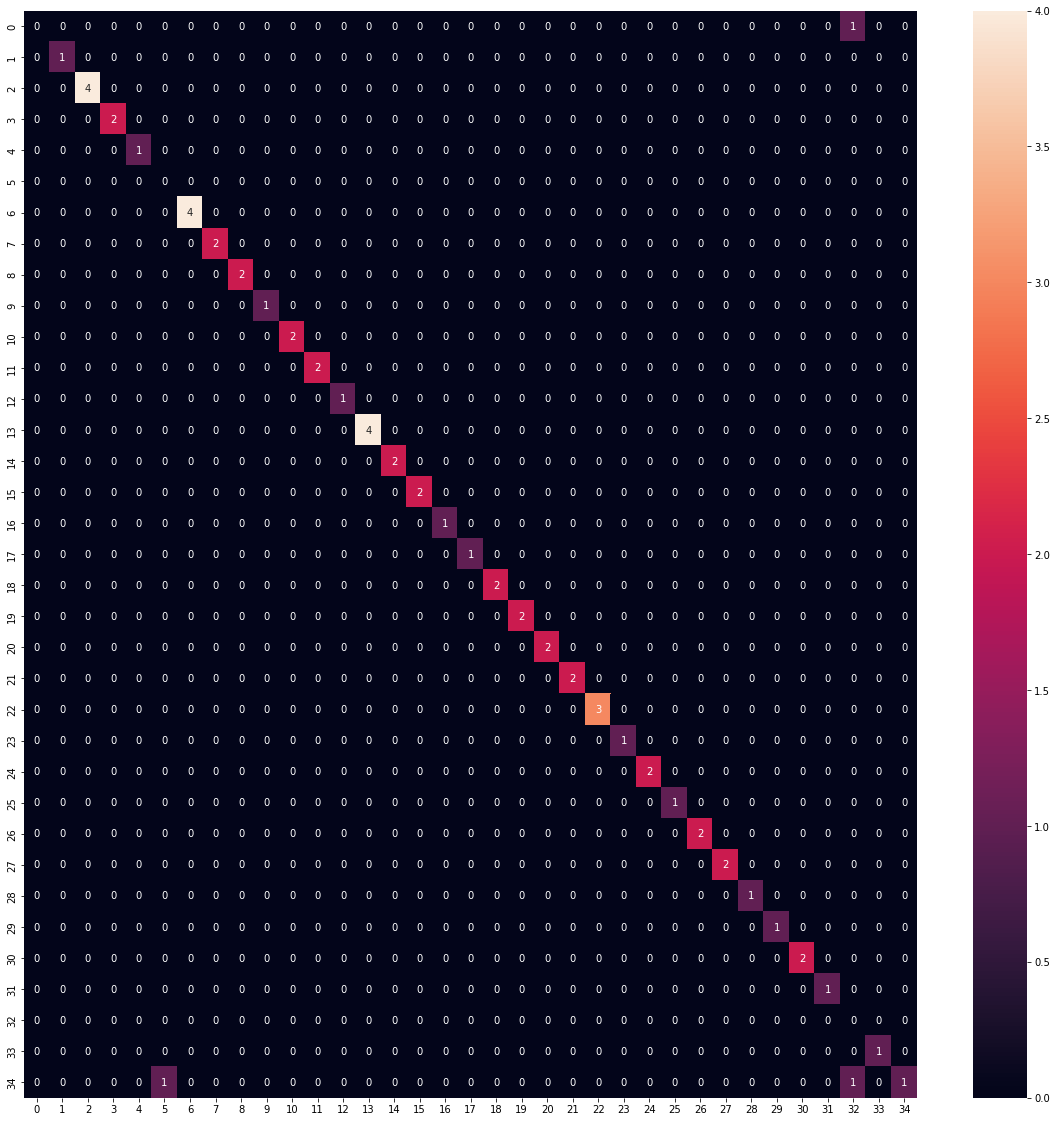

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [24]:
f1_score(y_test, y_pred, average='weighted')

0.9590163934426229

#Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50 , random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=42)

In [26]:
cross_val_score(dt,X_train,y_train,cv=3).mean()

0.6049382716049383

In [27]:
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.5737704918032787

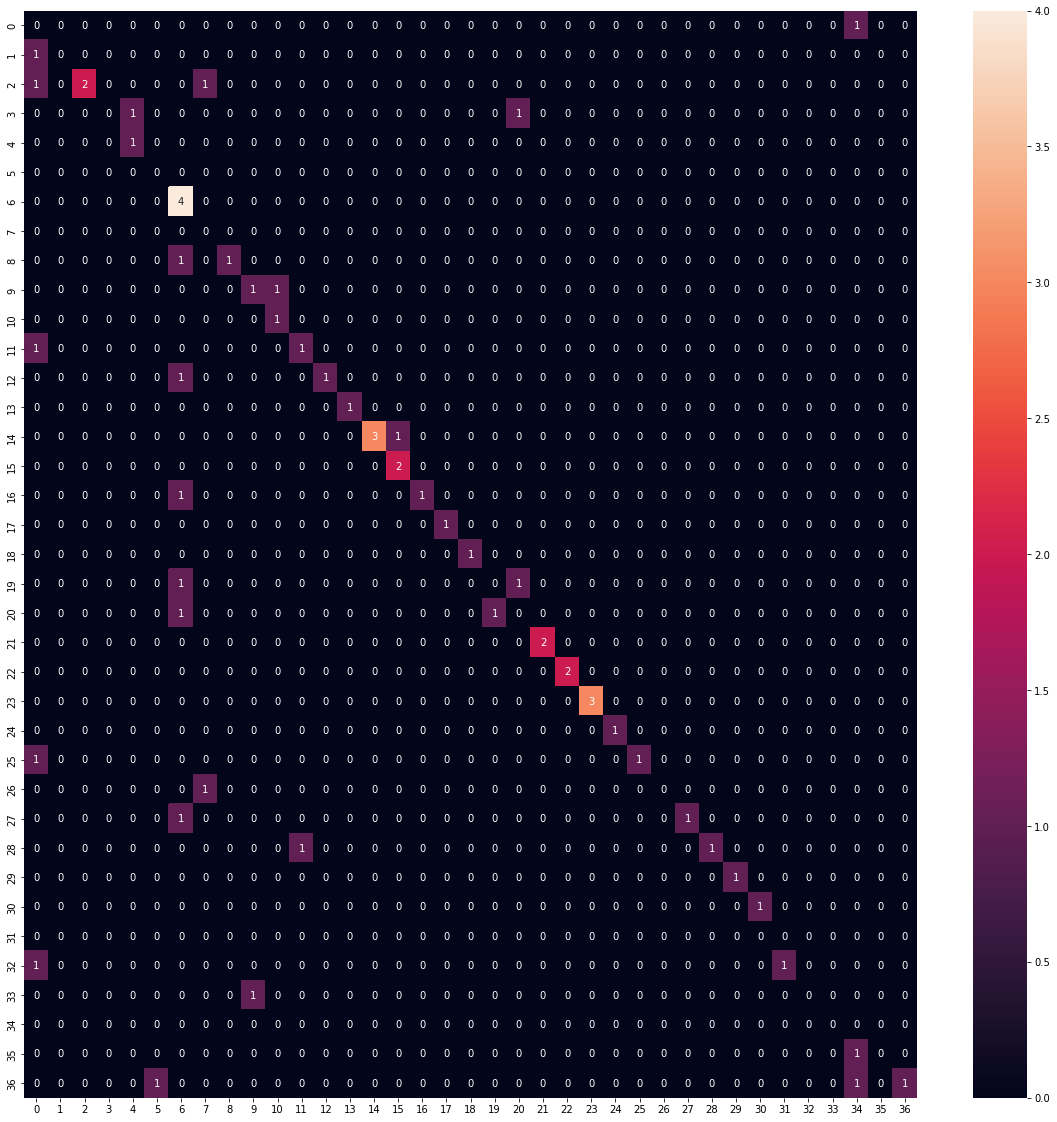

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [29]:
f1_score(y_test, y_pred, average='weighted')

0.5871194379391101

#Support Vector Machine Classifier (SVC)

In [30]:
from sklearn.svm import SVC

svc = SVC(kernel="poly", degree=3, coef0=1, C=5)
svc.fit(X_train,y_train)

SVC(C=5, coef0=1, kernel='poly')

In [31]:
cross_val_score(svc,X_train,y_train,cv=3).mean()

1.0

In [32]:
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

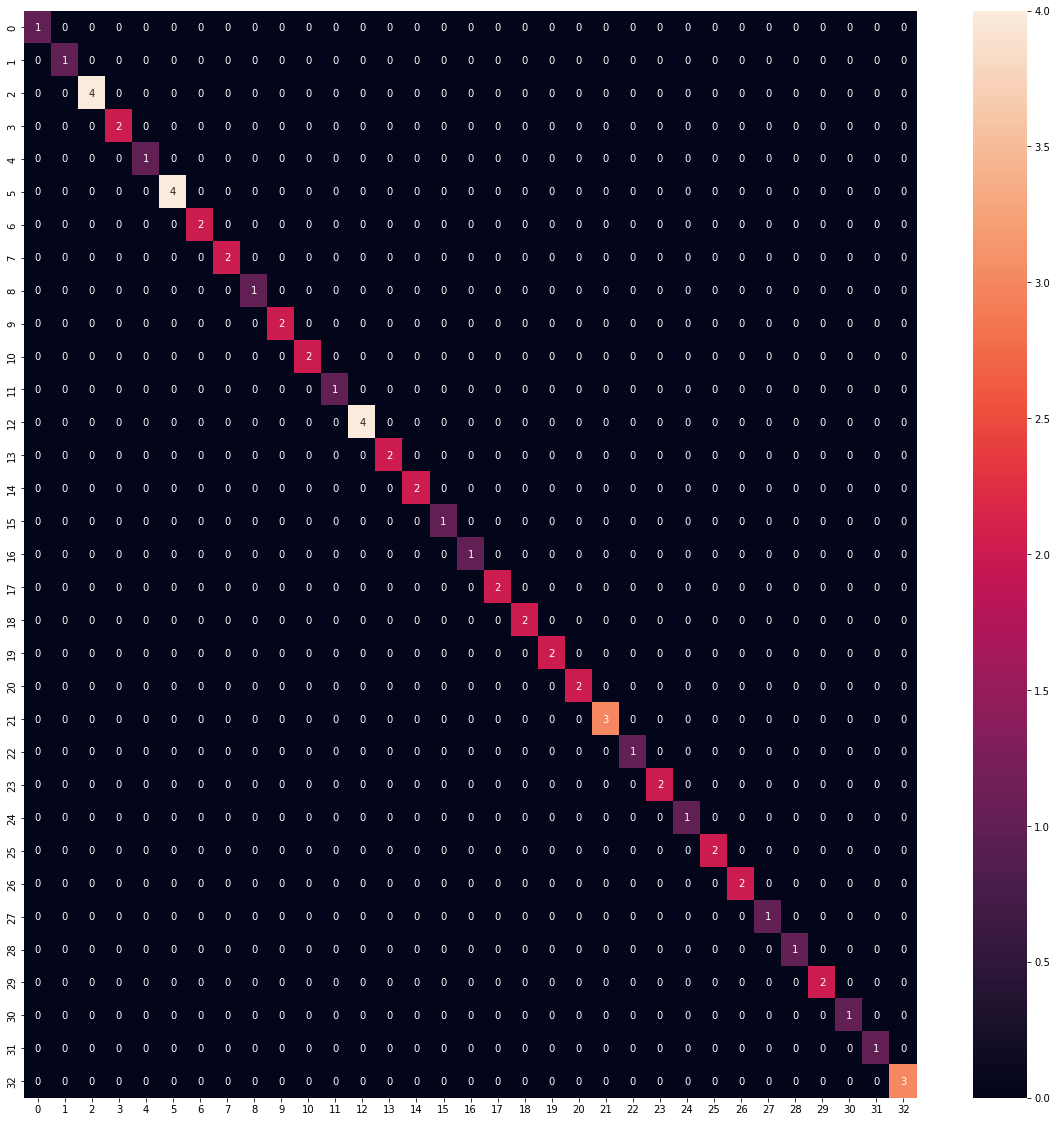

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [34]:
f1_score(y_test, y_pred, average='weighted')

1.0

#Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(n_jobs=-1)
lg.fit(X_train,y_train)

LogisticRegression(n_jobs=-1)

In [36]:
cross_val_score(lg,X_train,y_train,cv=3).mean()

1.0

In [37]:
y_pred = lg.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

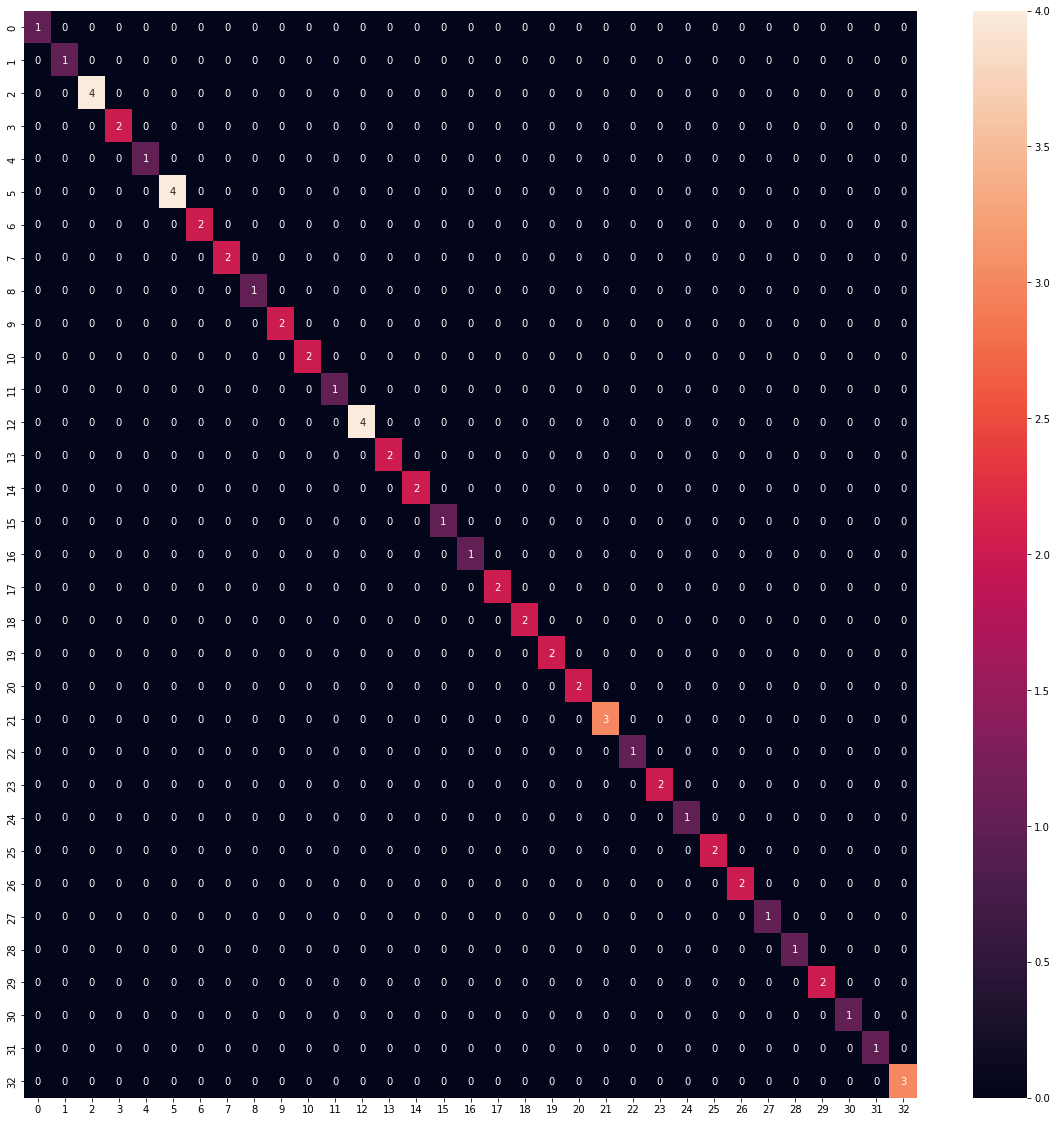

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [39]:
f1_score(y_test, y_pred, average='weighted')

1.0

#Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [41]:
cross_val_score(nb,X_train,y_train,cv=3).mean()

1.0

In [42]:
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

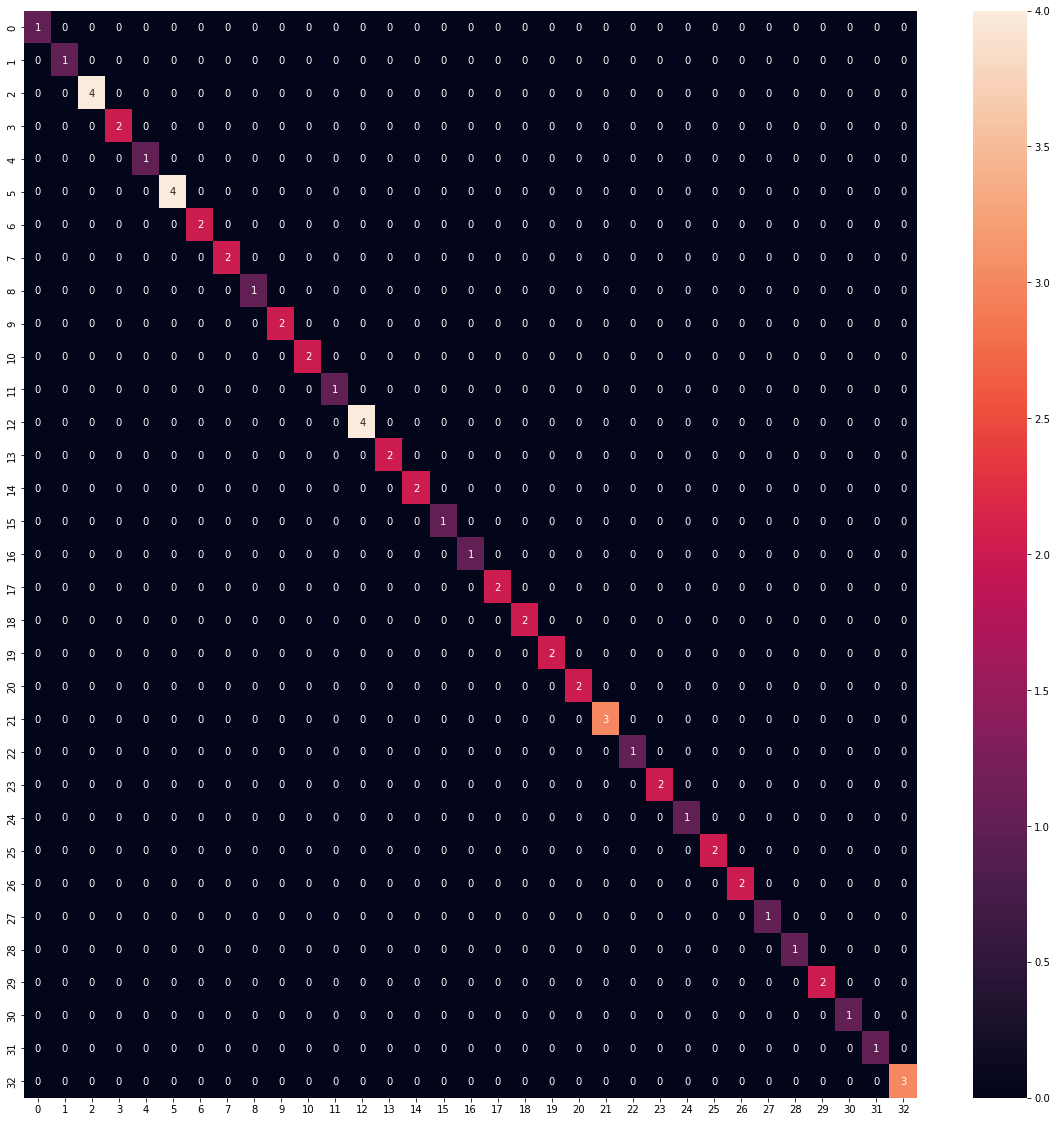

In [43]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [44]:
f1_score(y_test, y_pred, average='weighted')

1.0

#Ensemble

In [45]:
from sklearn.ensemble import VotingClassifier

vclf_soft = VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                                         ('Random Forest Classifier', RandomForestClassifier(criterion='entropy',n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)),
                                         ('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50 , random_state=42))], voting='soft', n_jobs=-1)


In [46]:
vclf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('Random Forest Classifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_leaf_nodes=50,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [47]:
cross_val_score(vclf_soft,X_train,y_train,cv=3).mean()

0.9958847736625515

In [48]:
y_pred = vclf_soft.predict(X_test)
accuracy_score(y_test,y_pred)

0.9836065573770492

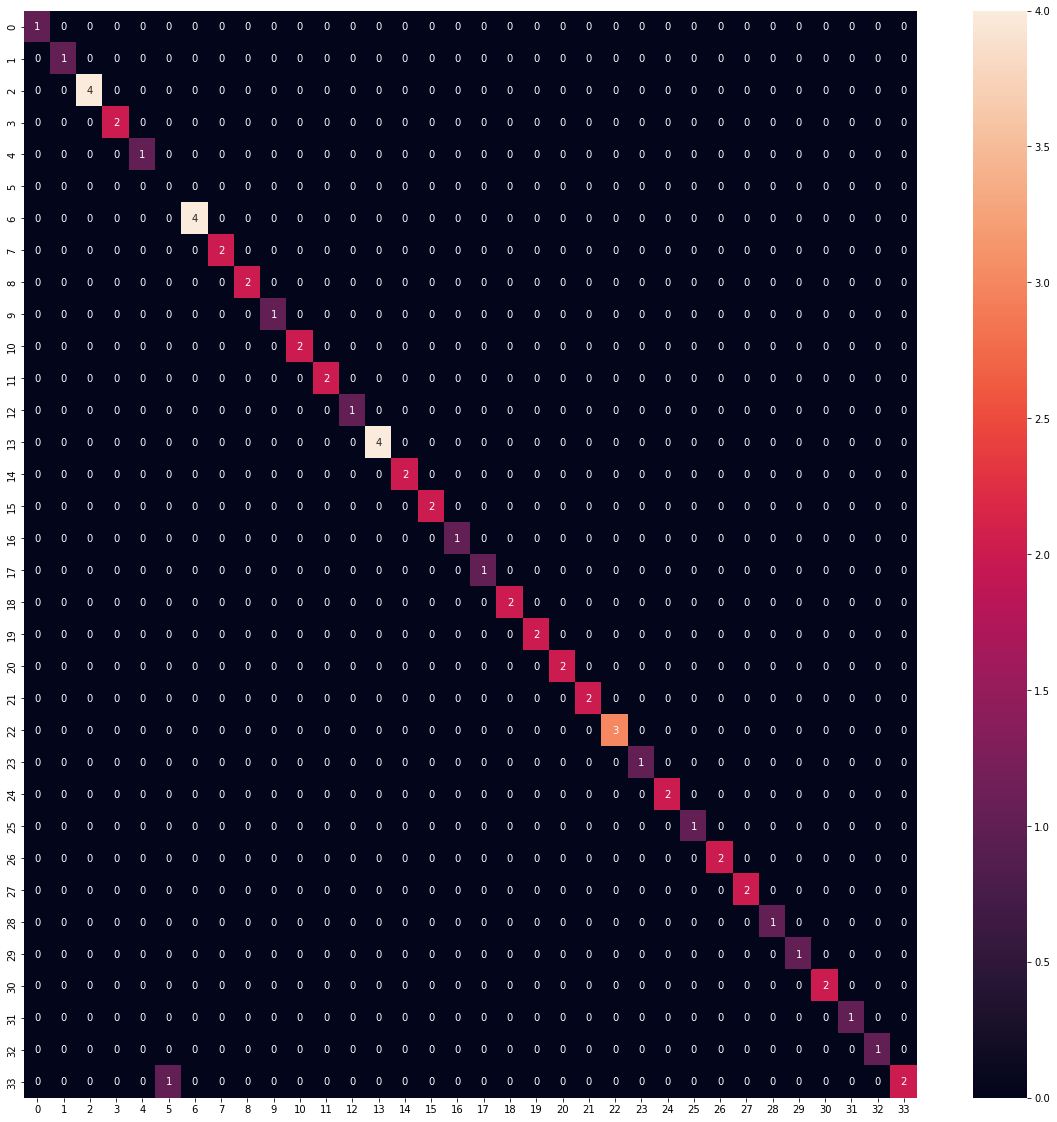

In [49]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [50]:
f1_score(y_test, y_pred, average='weighted')

0.9901639344262295

#PCA

In [51]:
from sklearn.decomposition import PCA

features = X

pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features,y)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca,y, test_size=0.20,random_state=SEED, stratify=y)

With PCA we reduced the features from 131 to 46 while keeping 95% variance.

In [52]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(243, 131) (243,) (61, 131) (61,)


In [53]:
print(X_train_pca.shape,y_train_pca.shape,X_test_pca.shape,y_test_pca.shape)

(243, 46) (243,) (61, 46) (61,)


##Random Forest Classifier PCA

In [54]:
rfclf_pca = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfclf_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [55]:
cross_val_score(rfclf_pca,X_train_pca,y_train_pca,cv=3).mean()

0.9794238683127571

In [56]:
y_pred_pca = rfclf_pca.predict(X_test_pca)
accuracy_score(y_test_pca,y_pred_pca)

1.0

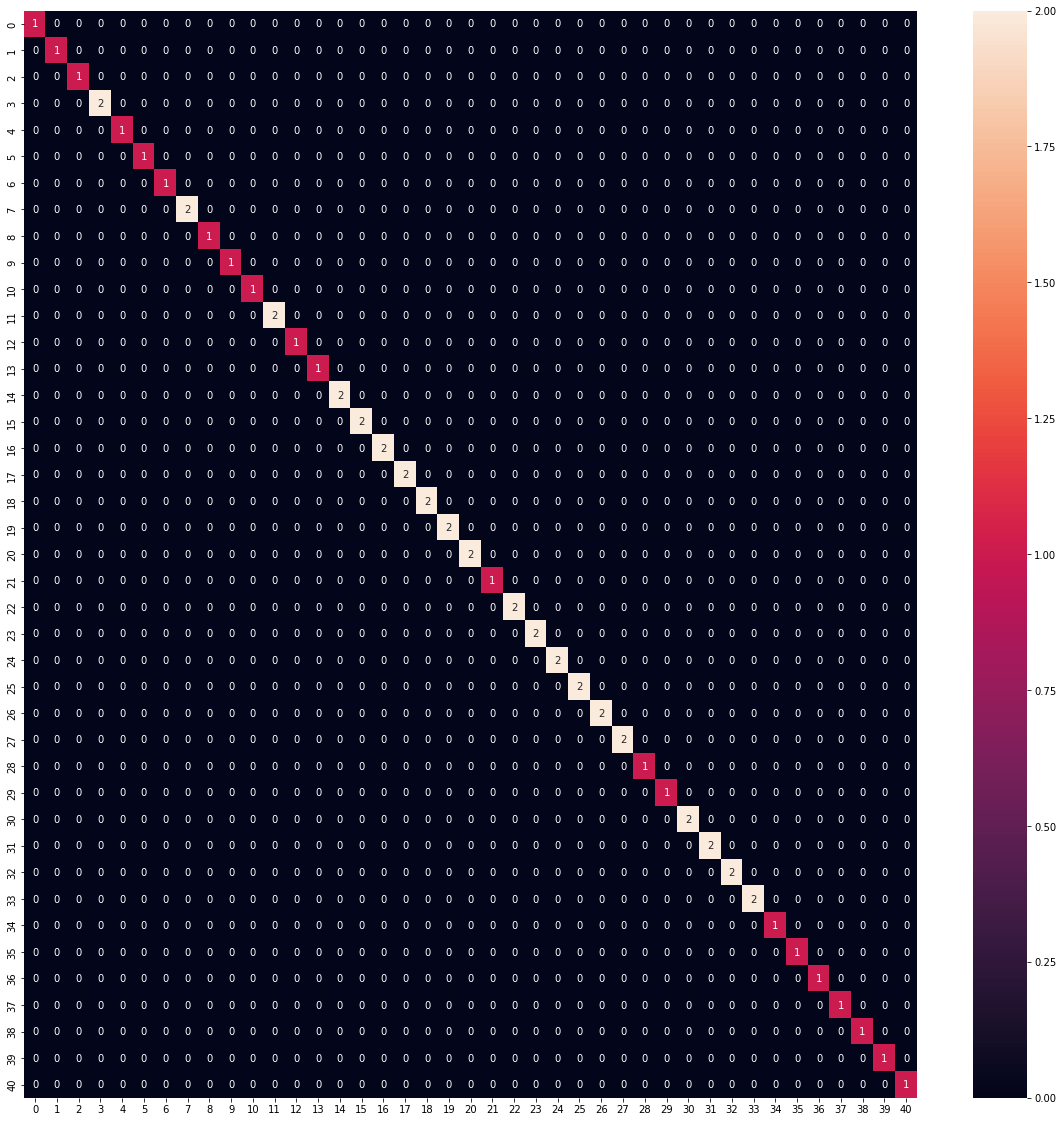

In [57]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True)

In [58]:
f1_score(y_test_pca, y_pred_pca, average='weighted')

1.0

##Decision Tree PCA

In [59]:
dt_pca = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50 , random_state=42)
dt_pca.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=42)

In [60]:
cross_val_score(dt_pca,X_train_pca,y_train_pca,cv=3).mean()

0.7818930041152262

In [61]:
y_pred_pca = dt_pca.predict(X_test_pca)
accuracy_score(y_test_pca,y_pred_pca)

0.8688524590163934

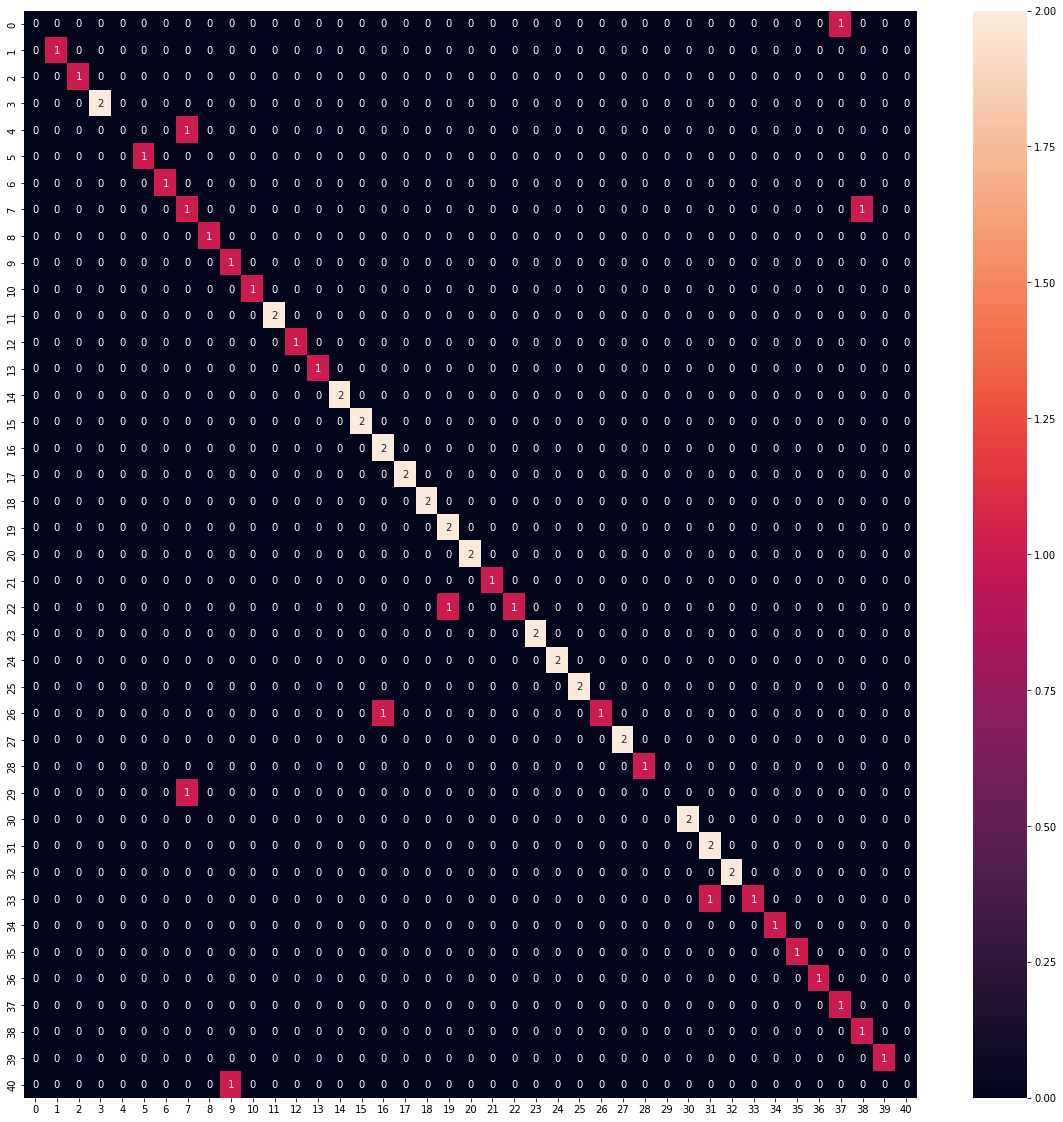

In [62]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True)

In [63]:
f1_score(y_test_pca, y_pred_pca, average='weighted')

0.8459016393442622

##Support Vector Machine Classifier (SVC) PCA

In [64]:
svc_pca = SVC(kernel="poly", degree=3, coef0=1, C=5)
svc_pca.fit(X_train_pca, y_train_pca)

SVC(C=5, coef0=1, kernel='poly')

In [65]:
cross_val_score(svc_pca,X_train_pca,y_train_pca,cv=3).mean()

1.0

In [66]:
y_pred_pca = svc_pca.predict(X_test_pca)
accuracy_score(y_test_pca,y_pred_pca)

1.0

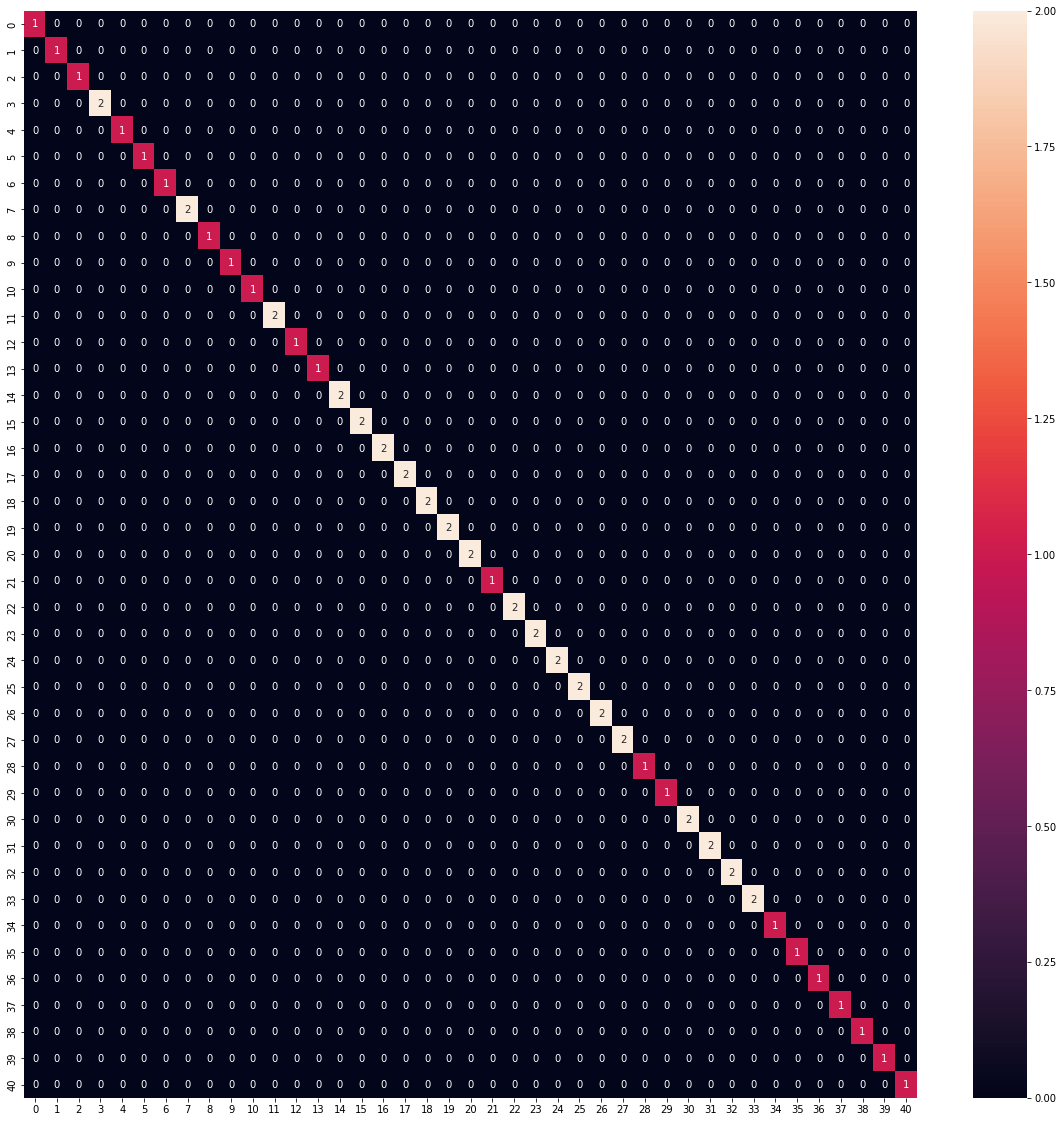

In [67]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True)

In [68]:
f1_score(y_test_pca, y_pred_pca, average='weighted')

1.0

##Logistic Regression PCA

In [69]:
lg_pca = LogisticRegression(n_jobs=-1)
lg_pca.fit(X_train_pca,y_train_pca)

LogisticRegression(n_jobs=-1)

In [70]:
cross_val_score(lg_pca,X_train_pca,y_train_pca,cv=3).mean()

1.0

In [71]:
y_pred_pca = lg_pca.predict(X_test_pca)
accuracy_score(y_test_pca,y_pred_pca)

1.0

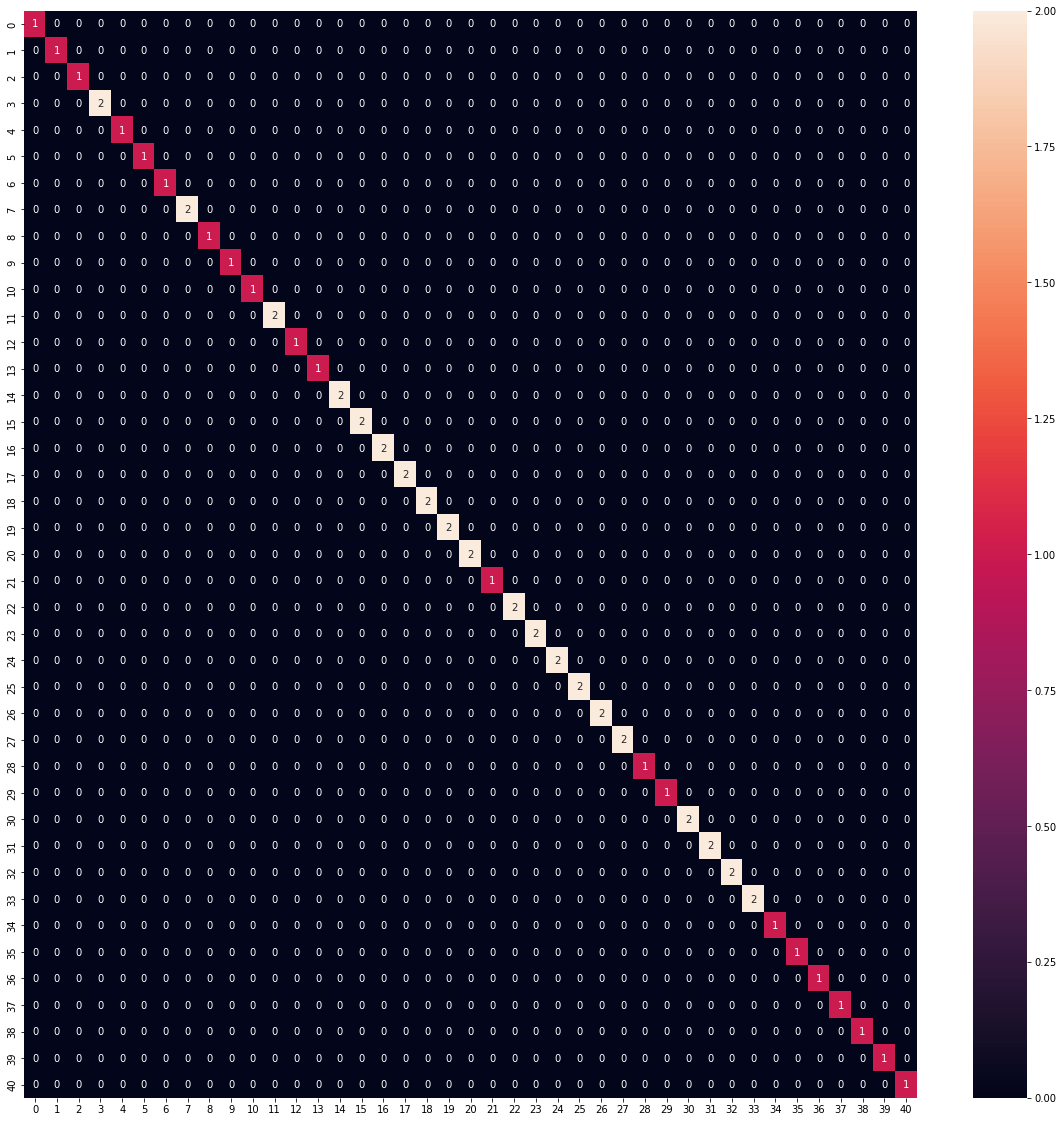

In [72]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True)

In [73]:
f1_score(y_test_pca, y_pred_pca, average='weighted')

1.0

##Naive Bayes PCA

In [74]:
from sklearn.naive_bayes import GaussianNB

nb_pca = GaussianNB()
nb_pca.fit(X_train_pca,y_train_pca)

GaussianNB()

In [75]:
cross_val_score(nb_pca,X_train_pca,y_train_pca,cv=3).mean()

0.831275720164609

In [76]:
y_pred_pca = nb_pca.predict(X_test_pca)
accuracy_score(y_test_pca,y_pred_pca)

0.9180327868852459

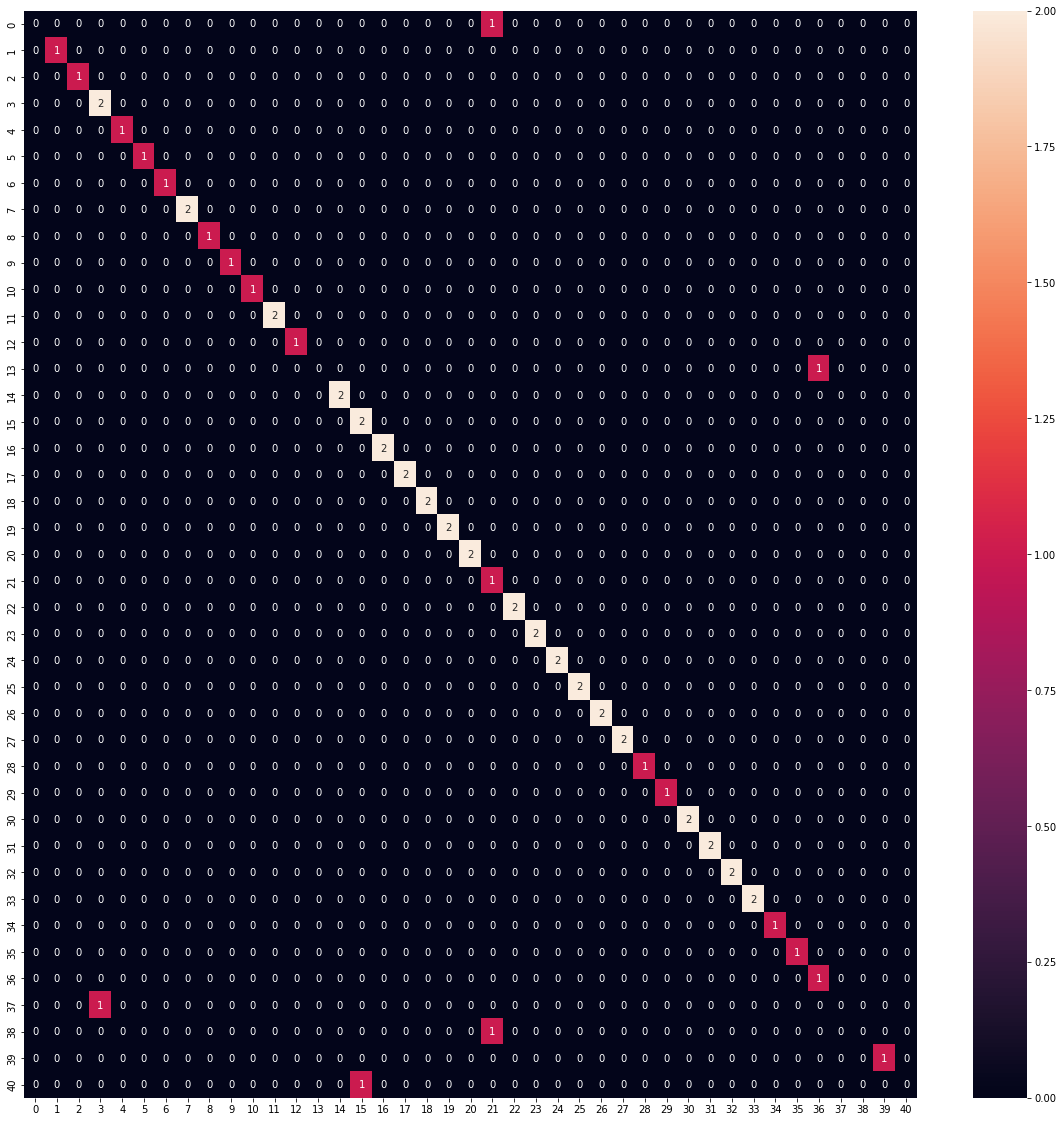

In [77]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True)

In [78]:
f1_score(y_test_pca, y_pred_pca, average='weighted')

0.891256830601093

##Ensemble PCA

In [79]:
vclf_soft_pca = VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                                         ('Random Forest Classifier', RandomForestClassifier(criterion='entropy',n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)),
                                         ('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50 , random_state=42))], voting='soft', n_jobs=-1)
vclf_soft_pca.fit(X_train_pca, y_train_pca)

VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('Random Forest Classifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_leaf_nodes=50,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [80]:
cross_val_score(vclf_soft_pca,X_train_pca,y_train_pca,cv=3).mean()

0.9218106995884773

In [81]:
y_pred_pca = vclf_soft_pca.predict(X_test_pca)
accuracy_score(y_test_pca,y_pred_pca)

0.9672131147540983

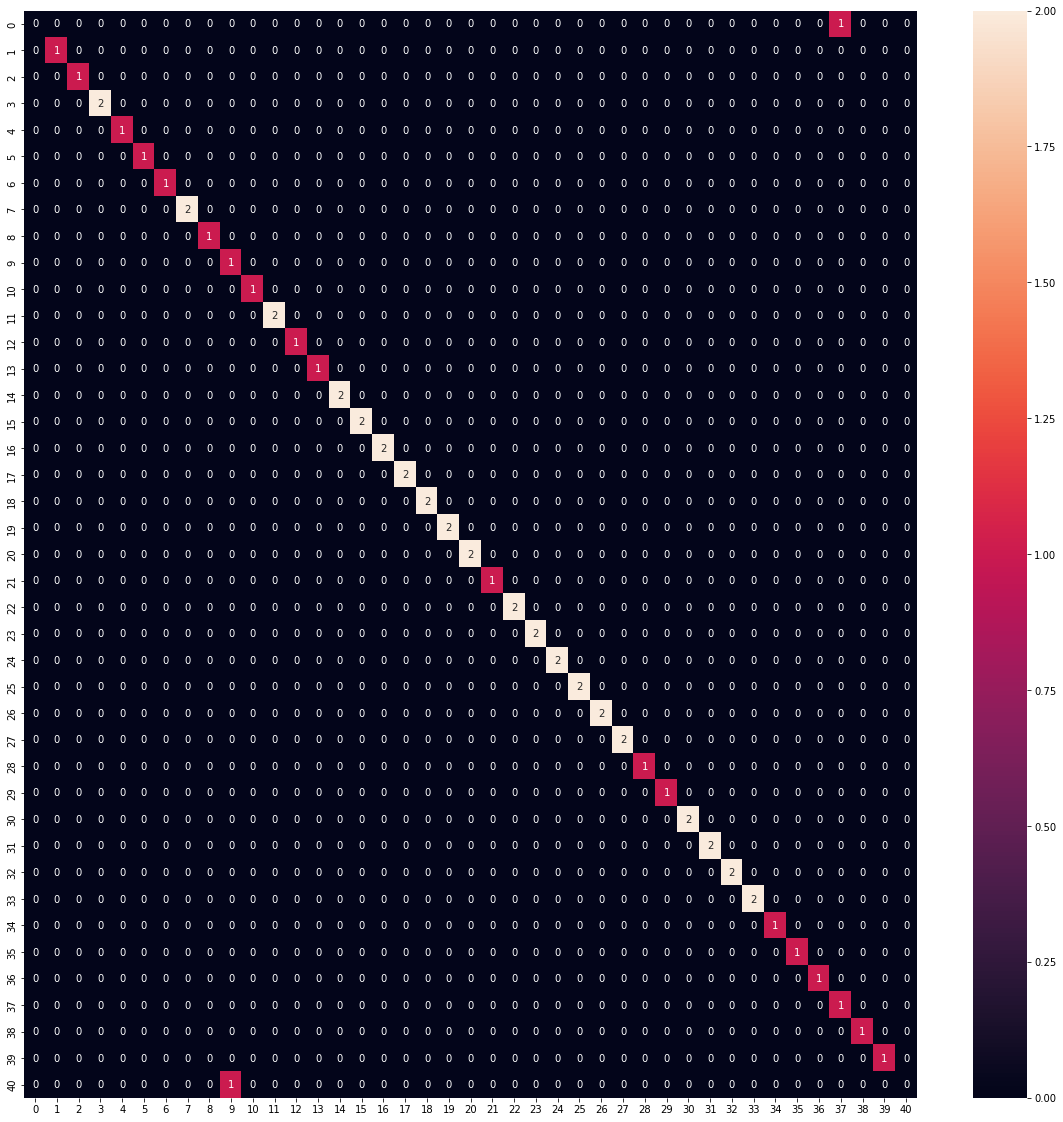

In [82]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True)

In [83]:
f1_score(y_test_pca, y_pred_pca, average='weighted')

0.9562841530054644

#My Top 3 Models:
Random Forest with PCA 100% Accuracy Score

Naive Bayes with no PCA 100% Accuracy Score

Ensemble with no PCA 98% Accuracy Score

